In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
import re
import string

contractions = { 
    "ain't": "are not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he shall have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I had",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I shall have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it shall have",
    "it's": "it has",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she shall have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they shall have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what shall have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who shall have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you shall have",
    "you're": "you are",
    "you've": "you have"
}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions.keys()))
def expand_contractions(text,contractions_dict=contractions):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

In [ ]:
def preprocess_text(x):

  x = x.lower()
  x = x.replace('<b>', '') 
  x = x.replace('<b>', '') 
  x = x.replace('</b>', '')
  x = x.replace('</b>','')
  x = x.replace('\n',' ')
  x = expand_contractions(x)
  x = re.sub('[%s]' % re.escape(string.punctuation), '' , x)
  x = remove_stopwords(x)

  return x

In [ ]:
import pandas as pd

dataset = pd.read_csv('how_to_disagree.csv', index_col = 0)
dataset = dataset.reset_index()
dataset = dataset.drop('index', 1)
    
# Expanding Contractions in the reviews
dataset.statement_1 = dataset.statement_1.apply(lambda x:preprocess_text(x))
dataset.statement_2 = dataset.statement_2.apply(lambda x:preprocess_text(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


In [ ]:
dataset.loc[dataset['label'] == 2]

,file,topic,statement_1,statement_2,label
380,NaN,NaN,issues wrestle practice groups law firms said,practice groups permitted work issues,2.0
381,NaN,NaN,says men,said men,2.0
382,NaN,NaN,surprised though many politics,surprised many politics,2.0
383,NaN,NaN,draft treaty tommys bait,treaty bait tommy,2.0
384,NaN,NaN,mtro subway fastest way move around city buses...,taking subway good way experience big city life,2.0
...,...,...,...,...,...
565,NaN,NaN,tunnel eupalinos explored claustrophobic,tunnel eupalinos one foot diameter barely larg...,2.0
566,NaN,NaN,thus recent evidence suggests including estima...,base alternative estimates perfectly understan...,2.0
567,NaN,NaN,ferdinand isabella spain underwent dramatic tr...,spain embarked long period stagnation ferdinan...,2.0
568,NaN,NaN,goals remain influential india approaches new ...,goals become ineffective india modernizes,2.0


In [ ]:
lenght_1 = 0
lenght_2 = 0
for i,r in dataset.iterrows():
    lenght_1 += len(r.statement_1)
    lenght_2 += len(r.statement_2)
    
print(f"Average length of statement_1:{lenght_1/len(dataset)}")
print(f"Average length of statement_2:{lenght_2/len(dataset)}")

Average length of statement_1:716.921052631579
Average length of statement_2:590.1284210526316


In [ ]:
X_1 = []
X_2 = []
X = []
for i,r in dataset.iterrows():
    r_1 = r.statement_1.split(' ')
    r_2 = r.statement_2.split(' ')
    r_1 = [w for w in r_1 if w.isdigit() == False and w.isalpha() == True]
    r_2 = [w for w in r_2 if w.isdigit() == False and w.isalpha() == True]
    
    X_1.append(r_1)
    X_2.append(r_2)
    X = X + r_1 + r_2


In [ ]:
lenght_1 = 0
lenght_2 = 0
for i,r in dataset.iterrows():
    lenght_1 += len(r.statement_1)
    lenght_2 += len(r.statement_2)
    
print(f"Average length of statement_1:{lenght_1/len(dataset)}")
print(f"Average length of statement_2:{lenght_2/len(dataset)}")

Average length of statement_1:716.921052631579
Average length of statement_2:590.1284210526316


In [ ]:
df = pd.DataFrame({"words" : X})
df = df.sort_values("words", axis = 0, ascending = True, inplace = False, kind = 'quicksort')
words = df.words.unique()

In [ ]:
dict_words = {}
reverse_dict_words = {}
for i, w in enumerate(words):
    dict_words[w] = i
    reverse_dict_words[i] = w

X_1 = [[dict_words[w] for w in s] for s in X_1]
X_2 = [[dict_words[w] for w in s] for s in X_2]

In [ ]:
import tensorflow as tf

vectorizer = tf.keras.layers.TextVectorization(max_tokens=20000, output_sequence_length=200)
text_ds = tf.data.Dataset.from_tensor_slices(dataset.statement_1+dataset.statement_2).batch(128)
vectorizer.adapt(text_ds)

voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

In [ ]:
!wget http://nlp.stanford.edu/data/glove.840B.300d.zip
!unzip -q glove.840B.300d.zip

--2022-02-10 17:14:56--  http://nlp.stanford.edu/data/glove.840B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.840B.300d.zip [following]
--2022-02-10 17:14:56--  https://nlp.stanford.edu/data/glove.840B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip [following]
--2022-02-10 17:14:56--  http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2176768927 (2.0G) [application/zip

In [ ]:
import numpy as np
import io

embeddings_dict = {}
with io.open("glove.840B.300d.txt", 'r', encoding = 'utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        try:
            vector = np.asarray(values[1:], "float32")
            embeddings_dict[word] = vector
        except:
            print(f"line {line} can't be parsed") 

line . . . -0.1573 -0.29517 0.30453 -0.54773 0.098293 -0.1776 0.21662 0.19261 -0.21101 0.53788 -0.047755 0.40675 0.023592 -0.32814 0.046858 0.19367 0.25565 -0.021019 -0.15957 -0.1023 0.20303 -0.043333 0.11618 -0.18486 0.0011948 -0.052301 0.34587 0.052335 0.16774 -0.21384 0.055947 0.24934 -0.12179 0.16749 0.28922 -0.033739 0.3015 -0.13241 0.092635 0.37155 -0.2884 -0.0052731 -0.001005 -0.51153 -0.28476 -0.20139 0.11837 -0.0055891 0.43604 0.16796 -0.2701 0.063957 -0.093253 -0.22079 0.36501 0.06545 0.23941 -0.19292 0.098293 0.12172 -0.1168 -0.027436 0.20507 -0.39139 -0.23111 0.46239 0.22888 -0.028415 -0.1798 0.23817 0.28093 -0.47935 0.23177 -0.35587 0.14246 0.11861 0.011018 0.091986 0.0054809 -0.39955 -0.40183 -0.10629 -0.30851 0.12383 -0.16737 -0.43569 0.4211 -0.57416 -0.19964 0.51312 0.090747 -0.21657 0.043519 0.24288 0.081134 0.49104 -0.33342 -0.31056 -0.3136 0.26931 -0.14402 0.33185 -0.21662 -0.072985 0.080603 -0.7266 -0.098385 -0.36233 -0.25346 0.1154 0.25738 0.15802 -0.15633 -0.02458

In [ ]:
num_tokens = len(voc) + 2
embedding_dim = 300
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_dict.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 8616 words (1493 misses)


In [ ]:
!pip install extra_keras_metrics

  Created wheel for extra-keras-metrics: filename=extra_keras_metrics-2.0.5-py3-none-any.whl size=14205 sha256=6cd8c0a42bce2de5fd2a1094d3a85d79034f81703cf735956416ca2f50e4c040
  Stored in directory: /root/.cache/pip/wheels/63/4e/93/db952d2851565bce46c84fc138a87c25119540133b5a2fda31
Successfully built extra-keras-metrics


In [ ]:
from tensorflow.keras.layers import Bidirectional, Dense, Concatenate, Softmax, Input, Embedding, GRU
from tensorflow.keras import initializers
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras import Model
from extra_keras_metrics import get_minimal_multiclass_metrics

def build_gru():
    int_sequences_input_1 = Input(shape=(None,), dtype="int64")
    int_sequences_input_2 = Input(shape=(None,), dtype="int64")
    
    embedding_layer = Embedding(
        num_tokens,
        embedding_dim,
        embeddings_initializer = initializers.Constant(embedding_matrix),
        trainable=False,
    )
    embedded_sequences = embedding_layer(int_sequences_input)
    
    return embedded_sequences
    
    gru_1 = Bidirectional(GRU(128))(embedded_sequences)
    
def build_model(n_classes):
    int_sequences_input_1 = Input(shape=(None,), dtype="int64")
    int_sequences_input_2 = Input(shape=(None,), dtype="int64")

    embedding_layer = Embedding(
        num_tokens,
        embedding_dim,
        embeddings_initializer = initializers.Constant(embedding_matrix),
        trainable=False,
    )
    embedded_sequences_1 = embedding_layer(int_sequences_input_1)
    embedded_sequences_2 = embedding_layer(int_sequences_input_2)

    gru_1 = Bidirectional(GRU(128))(embedded_sequences_1)
    gru_2 = Bidirectional(GRU(128))(embedded_sequences_2)
    
    base = Concatenate()([gru_1, gru_2])
    fully_connected_layers = Dense(128, activation = 'relu')(base)
    output_model = Dense(n_classes, activation="softmax")(fully_connected_layers)
    model = Model(inputs = [int_sequences_input_1, int_sequences_input_2], outputs = output_model, name = 'chainedBiGRU')
    
    model.compile(loss="categorical_crossentropy", optimizer = Nadam(learning_rate=0.001), metrics = get_minimal_multiclass_metrics())
    return model

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
number_of_splits = 10
skf = StratifiedKFold(
    n_splits=number_of_splits
)


In [ ]:
X = pd.DataFrame({"x_1": dataset.statement_1, "x_2": dataset.statement_2})
y = dataset.label.apply(lambda x: x-1).to_numpy().ravel()

In [ ]:
from tensorflow.keras.utils import to_categorical

results = []
for i, (train_indices, test_indices) in enumerate(skf.split(X, y)):
    X_1_train, X_2_train, X_1_test, X_2_test = X.x_1.iloc[train_indices], X.x_2.iloc[train_indices], X.x_1.iloc[test_indices], X.x_2.iloc[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    X_1_train = vectorizer(np.array([[s] for s in X_1_train])).numpy()
    X_2_train = vectorizer(np.array([[s] for s in X_2_train])).numpy()
    X_1_test = vectorizer(np.array([[s] for s in X_1_test])).numpy()
    X_2_test = vectorizer(np.array([[s] for s in X_2_test])).numpy()

    model = build_model(4)

    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    history = model.fit([X_1_train,X_2_train], y_train, batch_size=128, epochs=20, validation_data=([X_1_test, X_2_test], y_test))
    results.append((model, history))
    

Epoch 1/20
7/7 [==============================] - 33s 1s/step - loss: 1.1955 - accuracy: 0.4222 - recall: 0.1170 - precision: 0.8621 - AUROC: 0.7439 - AUPRC: 0.5177 - val_loss: 1.0002 - val_accuracy: 0.6316 - val_recall: 0.1684 - val_precision: 1.0000 - val_AUROC: 0.8828 - val_AUPRC: 0.7266
Epoch 2/20
7/7 [==============================] - 2s 226ms/step - loss: 0.8048 - accuracy: 0.7275 - recall: 0.3836 - precision: 0.8962 - AUROC: 0.9270 - AUPRC: 0.8192 - val_loss: 0.6110 - val_accuracy: 0.8737 - val_recall: 0.6000 - val_precision: 0.9500 - val_AUROC: 0.9717 - val_AUPRC: 0.9308
Epoch 3/20
7/7 [==============================] - 2s 219ms/step - loss: 0.4992 - accuracy: 0.8491 - recall: 0.7673 - precision: 0.8853 - AUROC: 0.9611 - AUPRC: 0.9007 - val_loss: 1.7044 - val_accuracy: 0.5684 - val_recall: 0.5579 - val_precision: 0.5699 - val_AUROC: 0.7840 - val_AUPRC: 0.5658
Epoch 4/20
7/7 [==============================] - 2s 224ms/step - loss: 0.4687 - accuracy: 0.8281 - recall: 0.8199 - pre

In [ ]:
mean_test_accuracy = np.mean([result[1].history['val_accuracy'][-1] for result in results])
mean_test_AUPRC = np.mean([result[1].history['val_AUPRC'][-1] for result in results])
mean_test_AUROC = np.mean([result[1].history['val_AUROC'][-1] for result in results])

print(f"MEAN RESULTS: Accuracy {mean_test_accuracy} | AUPRC {mean_test_AUPRC} | AUROC {mean_test_AUROC}")

MEAN RESULTS: Accuracy 0.9515789568424224 | AUPRC 0.9845254421234131 | AUROC 0.9939907550811767


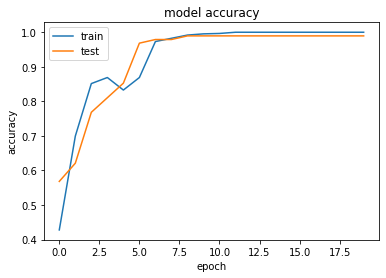

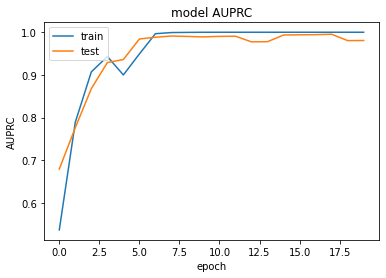

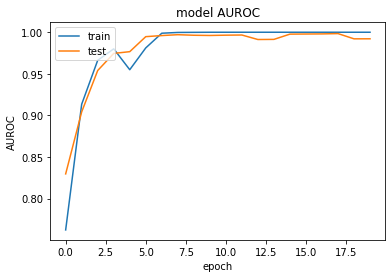

In [ ]:
import matplotlib.pyplot as plt 
best_index = np.argmax([result[1].history['val_accuracy'][-1] for result in results])
best_history = results[best_index][1]

plt.plot(best_history.history['accuracy'])
plt.plot(best_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(best_history.history['AUPRC'])
plt.plot(best_history.history['val_AUPRC'])
plt.title('model AUPRC')
plt.ylabel('AUPRC')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(best_history.history['AUROC'])
plt.plot(best_history.history['val_AUROC'])
plt.title('model AUROC')
plt.ylabel('AUROC')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()